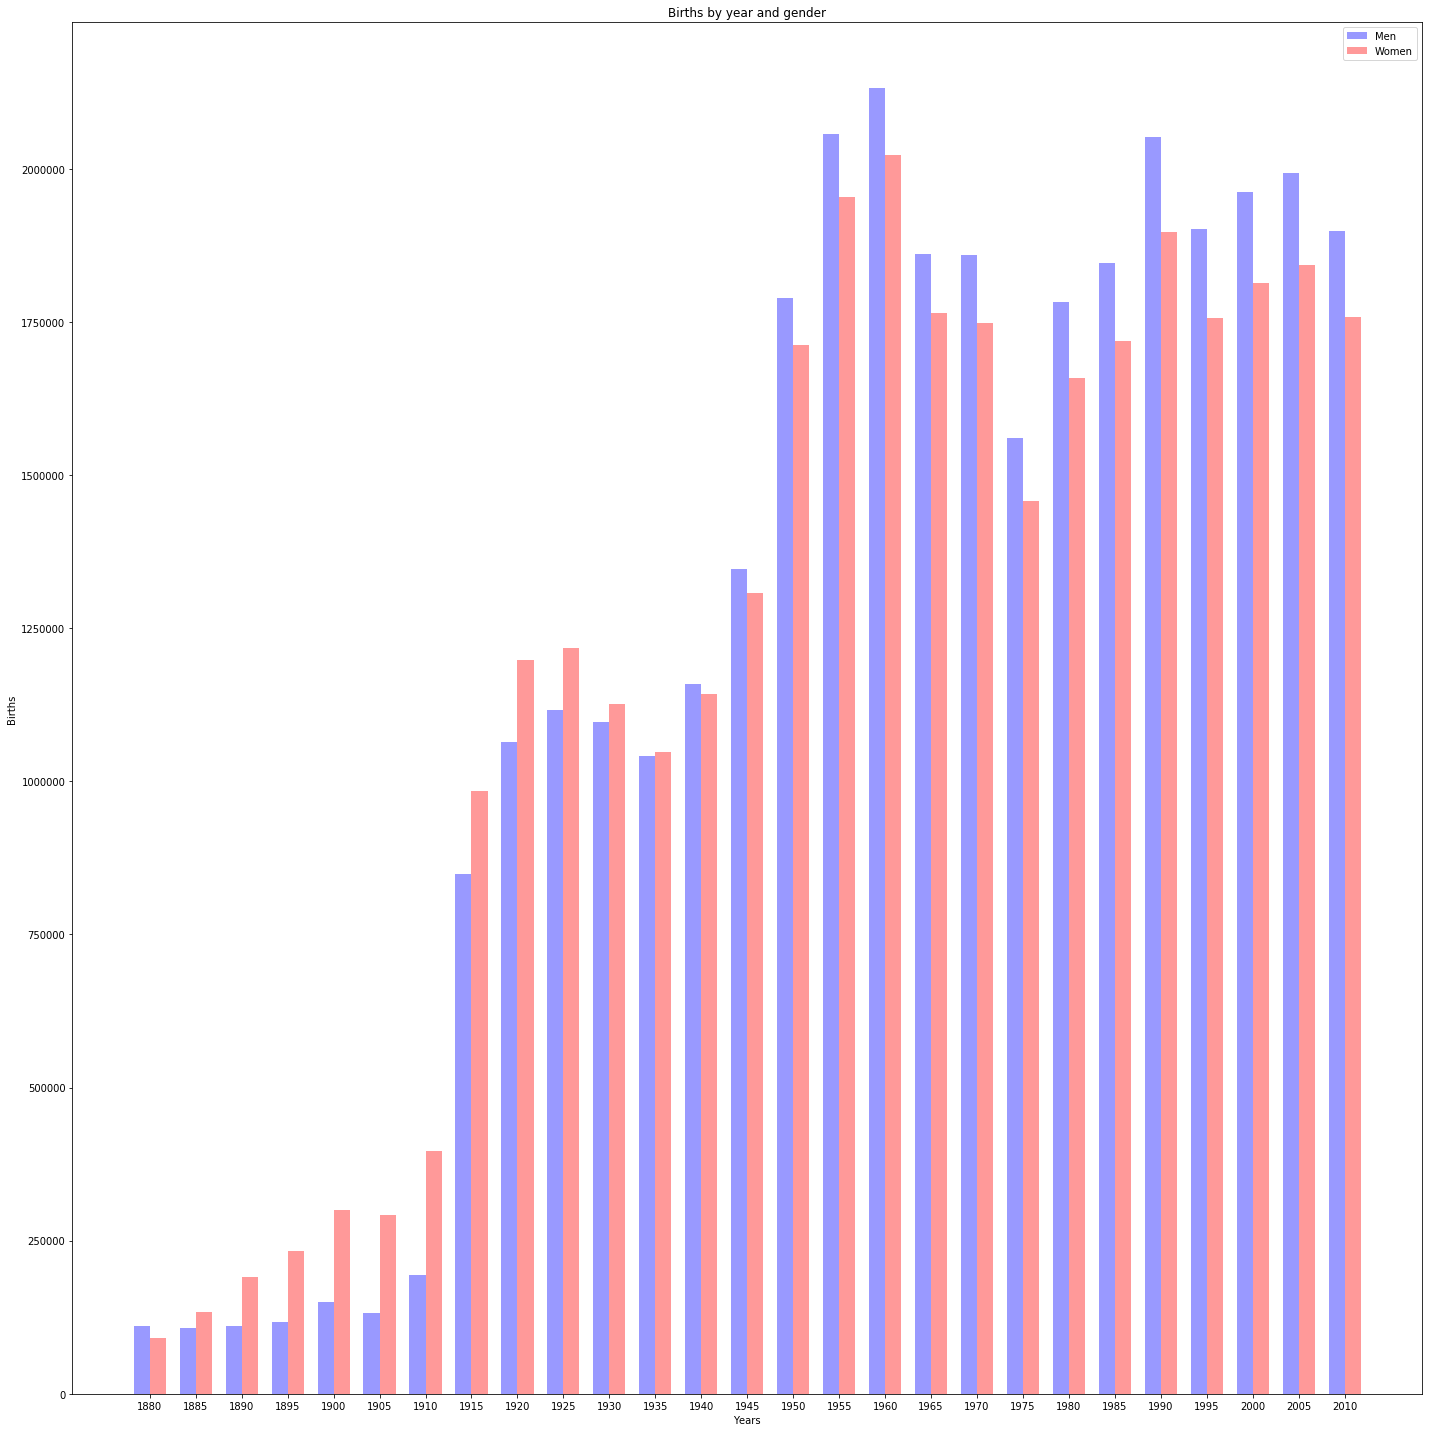

In [8]:
# Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

years = np.arange(1880, 2011, 5)

DataSetTemplate = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob{year}.txt'
dataframes = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframes.append(dataframe.assign(year=year))

result = pd.concat(dataframes)
sex = result.groupby('sex')
births_men = sex.get_group('M').groupby('year', as_index=False)
births_women = sex.get_group('F').groupby('year', as_index=False)
births_men_list = births_men.aggregate(np.sum)['count'].tolist()
births_women_list = births_women.aggregate(np.sum)['count'].tolist()

fig, ax = plt.subplots()
fig.set_size_inches(20,20)

index = np.arange(len(years))

bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, births_men_list, bar_width,
                alpha=opacity, color='b',
                label='Men')

rects2 = ax.bar(index + bar_width, births_women_list, bar_width,
                alpha=opacity, color='r',
                label='Women')

ax.set_xlabel('Years')
ax.set_ylabel('Births')
ax.set_title('Births by year and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

fig.tight_layout()
plt.show()


In [3]:
# Найдите самые популярные имена за всю историю
years = np.arange(1880, 2011)

dataframes = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframes.append(dataframe)

result = pd.concat(dataframes)
names = result.groupby('name', as_index=False).sum().sort_values('count', ascending=False)
names.head()['name'].tolist()

['James', 'John', 'Robert', 'Michael', 'Mary']

<bound method NDFrame.get of       name sex  count  part
942   John   M   9655     0
0     Mary   F   9217     0
0     Mary   F  11754     1
1474  John   M   9248     1>


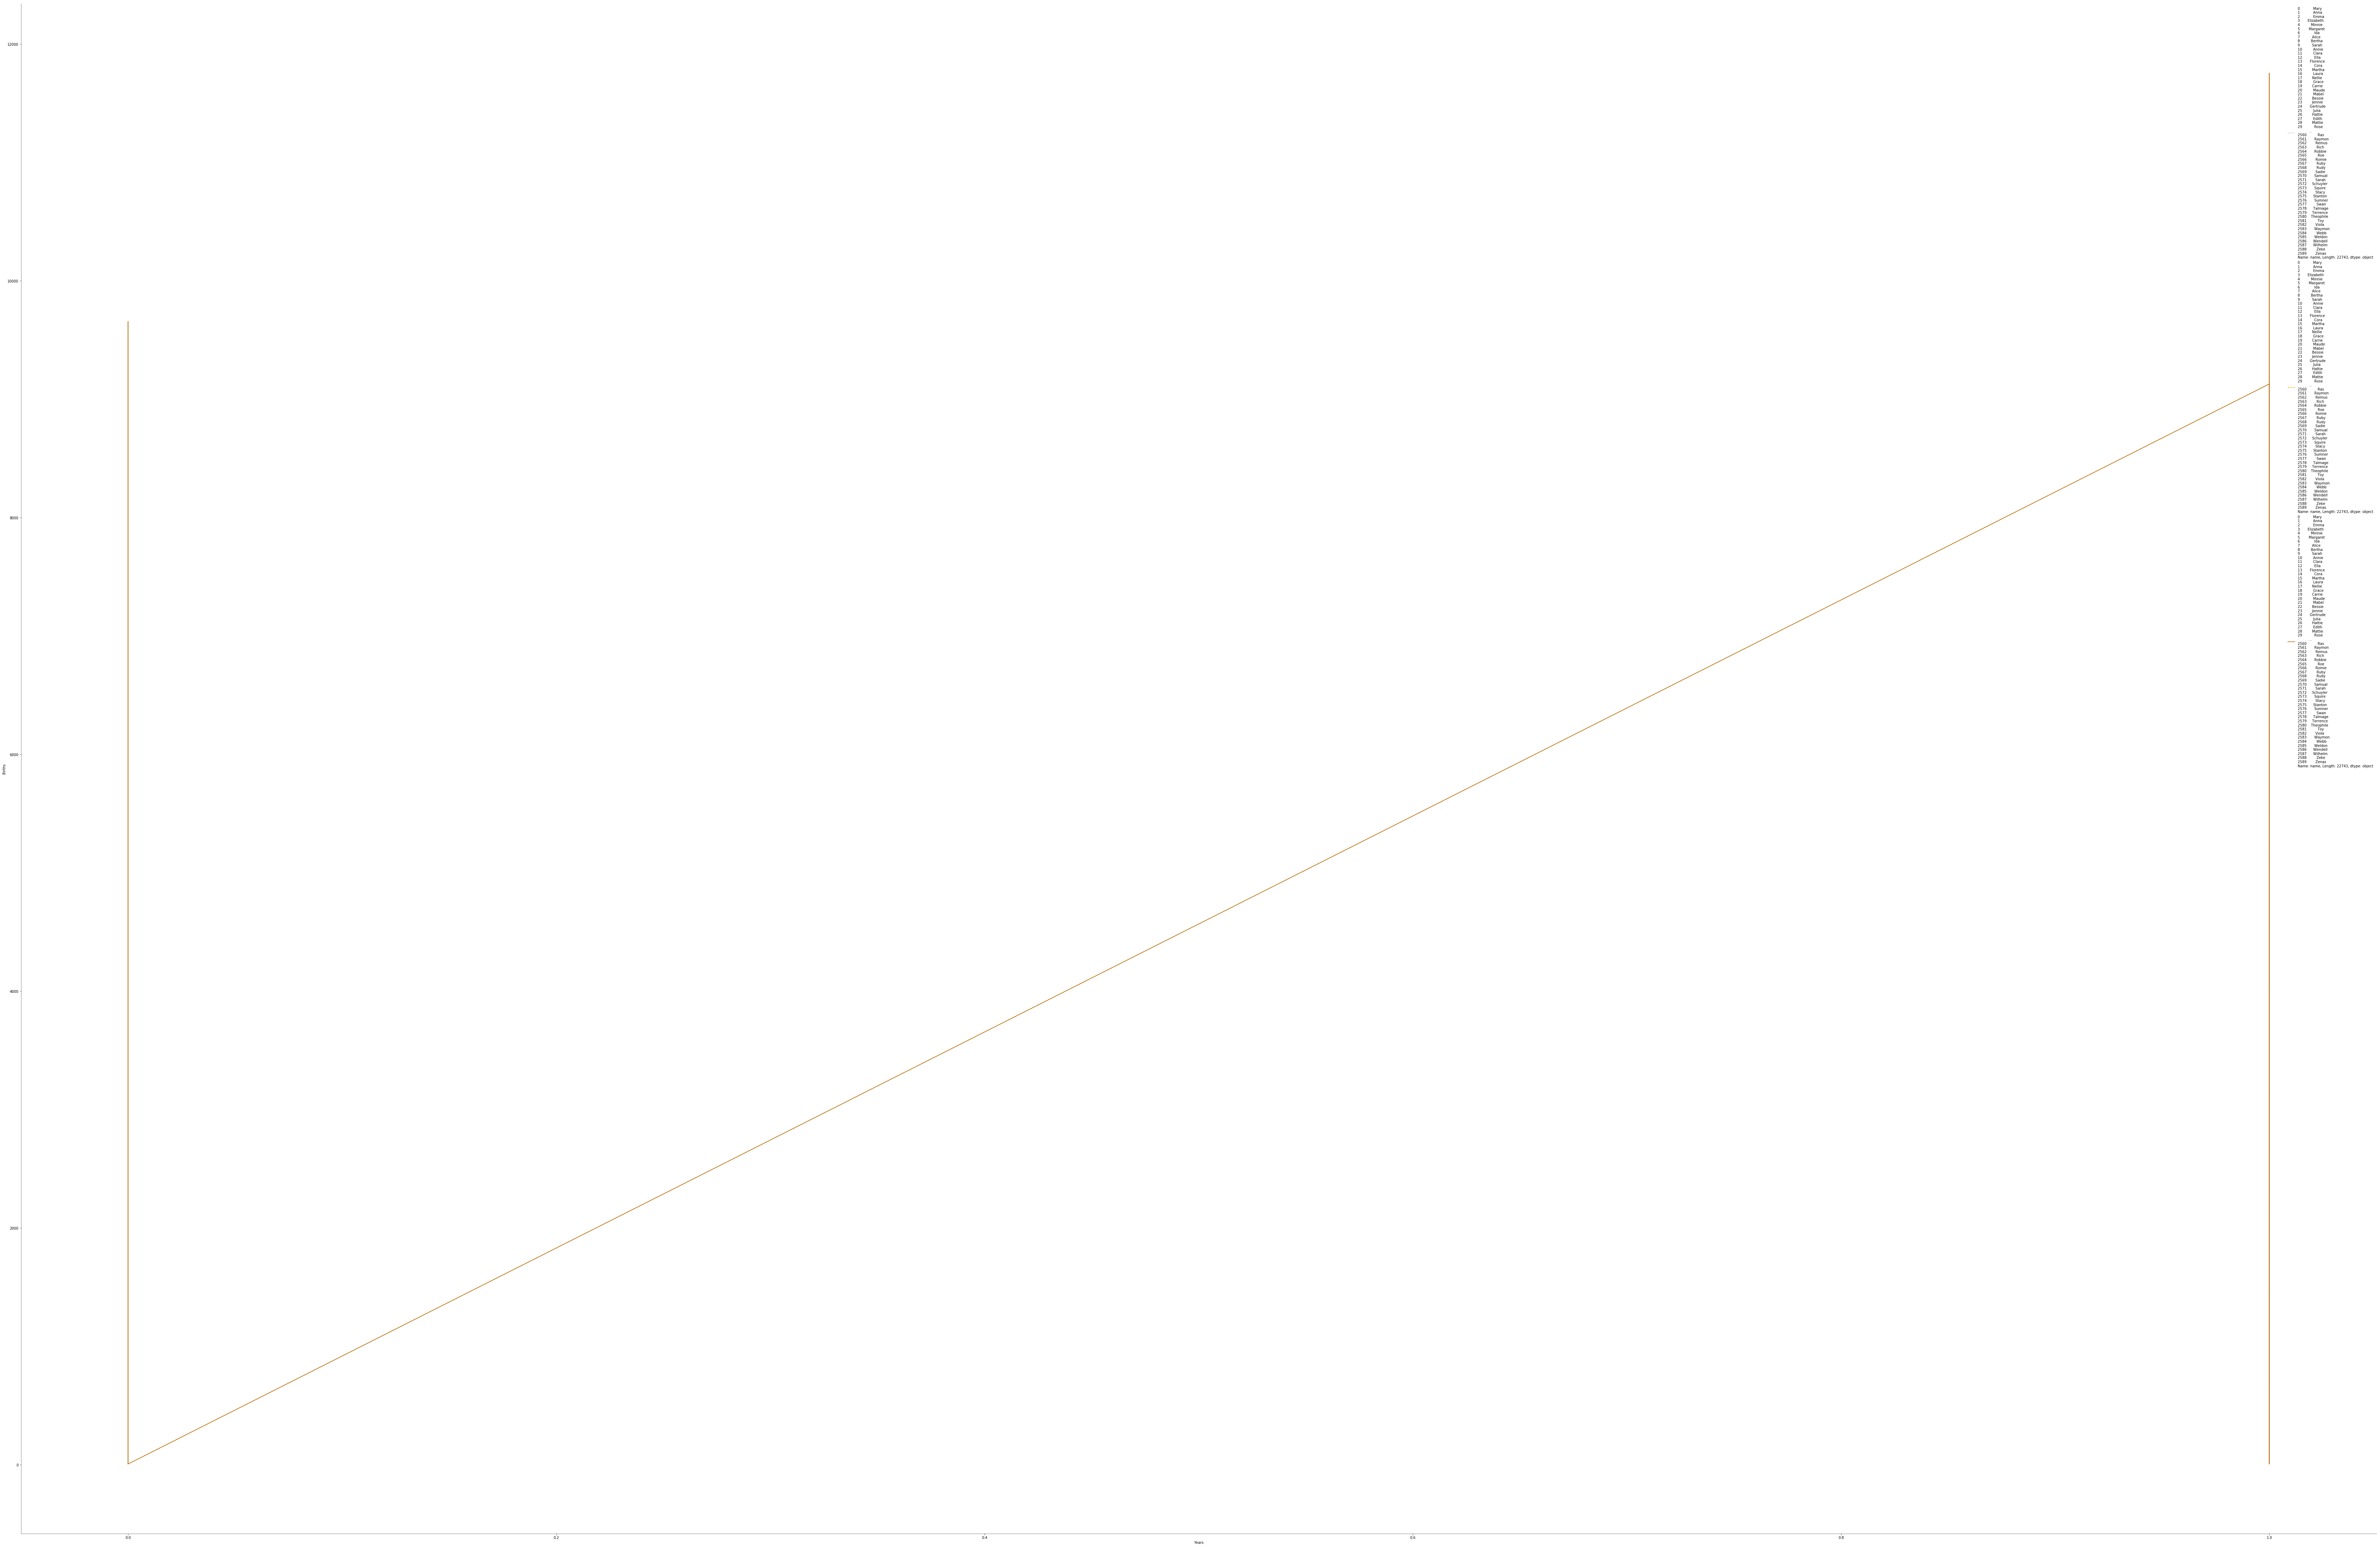

In [100]:
# Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола.
# Для каждого найденного имени визуализируйте его динамику за все время
years = np.arange(1880, 1890)#2011)
part_size = int((years[years.size - 1] - years[0]) / 2) + 1
parts = {}
def GetPart(year):
    return int((year - years[0]) / part_size)
for year in years:
    index = GetPart(year)
    r = years[0] + part_size * index, min(years[years.size - 1], years[0] + part_size * (index + 1))
    parts[year] = r

dataframe_parts = []
for year in years:
    dataset = DataSetTemplate.format(year=year)
    dataframe = pd.read_csv(dataset, names=['name', 'sex', 'count'])
    dataframe_parts.append(dataframe.assign(part=GetPart(year)))

result_parts = pd.concat(dataframe_parts)
idx = result_parts.groupby(['part', 'sex'])['count'].transform(max) == result['count']

print (result_parts[idx].get)

fig, ax1 = plt.subplots(1, 1, figsize=(120,80))

ax1.set_xlabel('Years', fontsize = 10)
ax1.set_ylabel('Births', fontsize = 10)

ax1.plot(result_parts['part'], result_parts['count'], label = result_parts['name'], color='#8c92ac', ls = ':'); 
ax1.plot(result_parts['part'], result_parts['count'], label = result_parts['name'], color='#ffa500', ls = '--');
ax1.plot(result_parts['part'], result_parts['count'], label = result_parts['name'], color='#b06500', ls = '-');
ax1.legend(loc=1, fontsize=10, frameon=False) # upper left corner


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.5)


In [5]:
# Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)


In [6]:
# Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени


In [7]:
# Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию